# Twitter数据爬取，清洗与分析

## 简介

我们将要整理 (以及分析和可视化) 的数据集是推特用户 @dog_rates 的档案, 推特昵称为 WeRateDogs。他以诙谐幽默的方式对人们的宠物狗评分。这些评分通常以 10 作为分母。但是分子则一般大于 10：11/10、12/10、13/10 等等。

WeRateDogs下载了他们的推特档案，并通过电子邮件发送给优达学城，专门为本项目使用。这个档案是基本的推特数据（推特 ID、时间戳、推特文本等），包含了截止到 2017 年 4 月 1 日的 5000 多条推特。


### 目标
清洗 WeRateDogs 推特数据，创建有趣且可靠的分析和可视化。<br/>
（但是这份推特档案只包含基本的推特信息。所以还需要收集额外的数据。）<br/>
<br/>
我们在这个项目中的任务如下：<br/>
数据整理，其中包括：<br/>
收集数据，评估数据，清洗数据。<br/>
对清洗过的数据进行储存、分析和可视化。<br/>
书面报告 (1) 数据整理工作 (2) 数据分析和可视化<br/>


### 步骤与细节

#### 1.数据收集
收集下面所述的三份数据：<br/>

1. WeRateDogs 的推特档案。这个数据文件是直接提供的，详见twitter_archive_enhanced.csv。
2. 推特图像的预测数据，这个文件你需要使用 Python 的 Requests 库和以下提供的 URL 来进行编程下载。
3. 每条推特的额外附加数据，要包含转发数（retweet_count）和喜欢数（favorite_count）这两列。推荐使用Twitter API。


#### 2.数据评估
收集上述三个数据集之后，使用目测评估和编程评估的方式，对数据进行质量和清洁度的评估。<br/>
完整地评估和清理整个数据集将需要大量时间，出于学习和实践的考虑，本项目只是评估和清理此数据集中的8个质量问题和2个整洁度问题。<br/>

#### 3.数据清洗
对你在评估时列出的每个问题进行清洗。展示清洗的过程,结果应该为一个优质干净整洁的主数据集（pandas DataFrame 类型）<br/>
根据整洁数据的规则要求，本项目的数据清理应该包括将三个数据片段进行合并。<br/>

#### 4.对项目数据进行存储、分析和可视化
将清理后的数据集存储到 CSV 文件中，命名为 twitter_archive_master.csv。如果有其他观察对象的数据集存在，需要多个表格，那么要给这些文件合理命名。<br/>
对清洗后的数据进行分析和可视化。生成至少 3 个见解和 1 个可视化。


#### 5.项目汇报
创建一个 300-600 字的书面报告，命名为 wrangle_report.pdf，在该报告中简要描述你的数据整理过程。这份报告可以看作是一份内部文档，供你的团队成员查看交流。<br/>

创建一个 250 字以上的书面报告，命名为 act_report.pdf，在该报告中，你可以与读者交流观点，展示你使用整理过的数据生成的可视化图表。这份报告可以看作是一份外部文档，如博客帖子或杂志文章。<br/>

#### 细节：

我们只需要含有图片的原始评级 (不包括转发)。尽管数据集中有 5000 多条数据，但是并不是所有都是狗狗评分，并且其中有一些是转发。<br/>
如果分子评级超过分母评级，不需要进行清洗。这个 特殊评分系统 是 WeRateDogs 人气度较高的主要原因。（同样，也不需要删除分子小于分母的数据）<br/>
不必收集 2017 年 8 月 1 日之后的数据，你可以收集到这些推特的基本信息，但是你不能收集到这些推特对应的图像预测数据，因为你没有图像预测算法的使用权限。<br/>
不要在项目提交中包含你的推特 API 密钥和访问令牌（可以用 * 号代替）。



### 以下我们开始进行具体操作
### 数据收集

In [1]:
#导入所需的包
import pandas as pd
import requests
import json
import os

In [2]:
#解决数据展示时被折叠的问题
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',150)

In [3]:
# 1.读取WeRateDogs的推特档案
df  = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# 2.使用Python的Requests库和提供的URL来进行编程下载推特图像的预测数据
url          = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
predict_file = url.split('/')[-1]
response     = requests.get(url)

# 防止文件多次加载
if not os.path.exists(predict_file):
    with open(predict_file, mode ='wb') as file:
        file.write(response.content)
        
img_predictions = pd.read_csv(predict_file, sep = '\t')   

In [5]:
# 3.加载每条推特的额外附加数据，包含转发数（retweet_count）和喜欢数（favorite_count）这两列。
file_extra   = open('tweet_json.txt', 'r') 
list_extra   = []

for line in file_extra.readlines():
    
    data           = json.loads(line)
    tweet_id       = data['id']
    retweet_count  = data['retweet_count']
    favorite_count = data['favorite_count']
    
    list_extra.append({
        'tweet_id': tweet_id,
        'retweet_count' : retweet_count,
        'favorite_count': favorite_count
    })
    
file_extra.close()

df_extra = pd.DataFrame(list_extra, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

### 数据评估

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [8]:
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [9]:
df['name'].value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
Bailey              7
Buddy               7
Toby                7
Daisy               7
an                  7
Dave                6
Rusty               6
Oscar               6
Scout               6
Milo                6
Koda                6
Jack                6
Bella               6
Stanley             6
Leo                 6
Jax                 6
Gus                 5
Bentley             5
Alfie               5
Finn                5
Phil                5
Louis               5
Sammy               5
Larry               5
George              5
Sunny               5
Chester             5
Oakley              5
very                5
Sampson             4
Reggie              4
Hank                4
Luna      

In [10]:
df['text'].sample(3)

689               This is Tonks. She is a service puppo. Can hear a caterpillar hiccup from 7 miles away. 13/10 would follow anywhere https://t.co/i622ZbWkUp
2355                      Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...
Name: text, dtype: object

In [11]:
df['timestamp'].sample(5)

549     2016-12-04 00:30:29 +0000
1815    2015-12-15 04:05:01 +0000
1389    2016-02-18 03:58:39 +0000
2301    2015-11-18 18:17:59 +0000
144     2017-05-15 00:02:33 +0000
Name: timestamp, dtype: object

In [12]:
df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
df[df['doggo'] != 'None'].sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
363,829374341691346946,NaN,NaN,2017-02-08 17:00:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1",13,10,Astrid,doggo,None,None,None
339,832273440279240704,NaN,NaN,2017-02-16 17:00:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SH...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832273440279240704/video/1,14,10,Smiley,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.co...",14,10,Bo,doggo,None,None,None
877,760893934457552897,NaN,NaN,2016-08-03 17:43:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wishes. He has the day off. Daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/H9YgrUkYwa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760893934457552897/photo/1,11,10,Wishes,doggo,None,None,None
574,801127390143516673,NaN,NaN,2016-11-22 18:17:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Anakin. He strives to reach his full doggo potential. Born with blurry tail tho. 11/10 would still pet well https://…,7.757333e+17,4.196984e+09,2016-09-13 16:30:07 +0000,https://twitter.com/dog_rates/status/775733305207554048/photo/1,11,10,Anakin,doggo,None,None,None


In [14]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
img_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
1205,741793263812808706,https://pbs.twimg.com/media/CkthBj7WgAAsIGb.jpg,1,kuvasz,0.311325,True,French_bulldog,0.115349,True,Labrador_retriever,0.068533,True
1809,832757312314028032,https://pbs.twimg.com/media/C46MWnFVYAUg1RK.jpg,2,Cardigan,0.160888,True,Staffordshire_bullterrier,0.159441,True,Boston_bull,0.154368,True
589,679132435750195208,https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg,1,Scottish_deerhound,0.194610,True,Irish_wolfhound,0.162855,True,giant_schnauzer,0.159837,True
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,miniature_pinscher,0.892925,True,toy_terrier,0.095524,True,Doberman,0.003544,True


In [16]:
img_predictions[img_predictions['p2_conf'] > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [17]:
img_predictions['p3_dog'].value_counts() 

True     1499
False     576
Name: p3_dog, dtype: int64

In [18]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [19]:
df_extra.sample(5)

,tweet_id,retweet_count,favorite_count
2086,670786190031921152,217,638
2315,666447344410484738,23,107
2119,670385711116361728,233,591
2250,667782464991965184,259,432
1212,714982300363173890,1162,4076


In [20]:
df_extra['tweet_id'].duplicated().sum()

0

#### 数据质量问题
##### 档案文件的质量问题
<br/>

推特档案数据：
- 1.我们只需要含有图片的原始评级，所以需要删除一些转发的数据， 有一些列可以删除
- 2.多列数据缺失严重
- 3.source table: 数据需要提取，整理成Ipone客户端,Web客户端,VINE, tweet deck四个选项
- 4.评分的提取不太准确
- 5.text table: 既有文字，又有网址和评分，应当拆分
- 6.name table: 有的name提取不正确
- 7.timestamp table : 数据类型转换为时间类型
- 8.有时同一条数据中， 含有多个狗的地位数据， 正常情况下只能有doggo，floofer，pupper，puppo 中的一个

##### 数据整洁度问题

- 推特数据中，doggo，floofer，pupper，puppo栏应当删掉，建立新的地位栏，并填入每条所对应的'doggo	floofer	pupper	puppo'其中一个.  
- 补充数据中的两个计数栏可以合并到推特数据中.

### 数据清洗

In [21]:
# 对原数据进行复制， 在复制数据中进行数据清洗，从而保留原数据的完整性
df_copy               = df.copy()
img_predictions_copy  = img_predictions.copy()
df_extra_copy         = df_extra.copy()

##### 1. 我们只需要含有图片的原始评级，所以需要删除一些转发的数据

In [22]:
df_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


此时，与转发相关的列已被删除

##### 2.多个列数据缺失严重

经观察，有数据较多缺失的列与核心数据分析关联不大，故我将‘in_reply_to_status_id’，‘in_reply_to_user_id’，‘expanded_urls’列删掉

In [24]:
df_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'], axis = 1, inplace = True)

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


经检验，此时数据比较完整

##### 3. source栏数据需要提取成Ipone客户端,Web客户端,VINE, tweet deck四个选项

In [26]:
df_copy['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [27]:
df_copy['source'] = df_copy['source'].str.strip('</a>').str.split('>').str[1]

In [28]:
df_copy['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

成功提取出文字选项

##### 4. 评分提取不太准确

In [29]:
df_copy['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [30]:
df_copy['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [31]:
df_copy[['text', 'rating_numerator', 'rating_denominator']].loc[45]

text                  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
rating_numerator                                                                                                                                             5
rating_denominator                                                                                                                                          10
Name: 45, dtype: object

In [32]:
df_copy[['text', 'rating_numerator', 'rating_denominator']].loc[340]

text                  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
rating_numerator                                                                                                                                                75
rating_denominator                                                                                                                                              10
Name: 340, dtype: object

###### 两栏的特殊值统计全是整数，未能提取text中浮点数评分

故建立新的提取规则

In [33]:
numerator_ratings   = df_copy['text'].str.extract(r'((\d+(\.\d+)?\/))', expand=True)[0].str.strip('/')

In [34]:
denominator_ratings = df_copy['text'].str.extract(r'((\/\d+(\.\d+)?))', expand=True)[0].str.strip('/')

In [35]:
df_copy.loc[:, ['rating_numerator']]   = numerator_ratings

In [36]:
df_copy.loc[:, ['rating_denominator']] = denominator_ratings

In [37]:
df_copy['rating_numerator'].value_counts()

12       558
11       464
10       461
13       351
9        158
8        102
14        54
7         54
5         35
6         32
3         19
4         17
2          9
1          9
15         2
420        2
9.75       2
0          2
143        1
13.5       1
11.26      1
50         1
960        1
80         1
17         1
45         1
144        1
1776       1
44         1
84         1
11.27      1
60         1
666        1
88         1
182        1
24         1
121        1
204        1
165        1
99         1
007        1
9.5        1
20         1
Name: rating_numerator, dtype: int64

In [38]:
# 把评分两栏从字符串类型 转化为浮点数类
df_copy[['rating_numerator', 'rating_denominator']] = df_copy[['rating_numerator', 'rating_denominator']].astype('float')

提取浮点数成功

###### 对分母不为10的行进行与text中原数据比对，校正

In [39]:
df_copy[df_copy['rating_denominator'] == 2]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11 +0000,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1.0,2.0,an,None,None,None,None


In [40]:
df_copy[df_copy['rating_denominator'] == 15]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,2017-02-16 04:45:50 +0000,Twitter for iPhone,@docmisterio account started on 11/15/15,11.0,15.0,None,None,None,None,None


In [41]:
df_copy[df_copy['rating_denominator'] == 7]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,24.0,7.0,Sam,None,None,None,None


In [42]:
df_copy[df_copy['rating_denominator'] == 0]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,Twitter for iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0,None,None,None,None,None


In [43]:
#手动修改
df_copy.iloc[2335,4:6] = 9, 10
df_copy.iloc[342,4:6]  = 0, 0
df_copy.iloc[516,4:6]  = 0, 0
df_copy.iloc[313,4:6]  = 13, 10

In [44]:
# 查看修改后的值，已无误
df_copy.iloc[2335, 4:6]

rating_numerator       9
rating_denominator    10
Name: 2335, dtype: object

此时，评分两栏的清洗基本完成

##### 5. text栏: 既有文字，又有网址，应当拆分

需要查找，学习pandas中字符数据的处理方法

In [45]:
df_copy.text.sample()

1553    Meet Clarence. He does parkour. 8/10 very talented dog https://t.co/WpSFZm7RPH
Name: text, dtype: object

In [46]:
#提取出网址， 自成为新的一栏
df_copy['url'] = df_copy.text.str.extract("(https\:.*)", expand = True)

In [47]:
df_copy[['url']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 1 columns):
url    2284 non-null object
dtypes: object(1)
memory usage: 18.5+ KB


In [48]:
df_copy.url.fillna('None', inplace = True)

In [49]:
df_copy[['url']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 1 columns):
url    2356 non-null object
dtypes: object(1)
memory usage: 18.5+ KB


In [50]:
df_copy['url'].value_counts().sort_values()
#通过观察， 网址数据存在质量问题， 由于与所需要分析的问题不相关， 我们暂时不对他进行清洗

https://t.co/xe1aGZNkcC                             1
https://t.co/EdKG43VvEl                             1
https://t.co/QQZDCYl6zT                             1
https://t.co/oQqlOsla4R                             1
https://t.co/PN8hxgZ9We                             1
https://t.co/f9qlKiv39T                             1
https://t.co/AbBLh2FZCH                             1
https://t.co/8sdVenUAqr                             1
https://t.co/qy33OBcexg                             1
https://t.co/u51tzXSVi3                             1
https://t.co/FyHrk20gUR                             1
https://t.co/RhUEAloehK                             1
https://t.co/d9NcXFKwLv                             1
https://t.co/BYiXJDEzv7                             1
https://t.co/gzRghPC61H                             1
https://t.co/a34N7QwKbb                             1
https://t.co/1DzInODwrj                             1
https://t.co/yOVzAomJ6k                             1
https://t.co/AUJi8ujxw9     

In [51]:
total_rows = df_copy.shape[0]

In [52]:
total_rows 

2356

In [53]:
def extract_text():
    for n in range(total_rows):
        df_copy.loc[n, 'text'] = df_copy.text[n].rstrip(df_copy.url[n])

In [54]:
#在text栏里去除掉网址的部分
extract_text()

In [55]:
#在text栏里去除掉评分的部分
df_copy['text'] = df_copy['text'].str.replace(r'(\d+(\.\d+)?\/\d+(\.\d+)?)', '')

In [56]:
df_copy[['text']].loc[184]

text    THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A . WOULD BE AN HONOR TO FLY WITH 
Name: 184, dtype: object

此时 text栏基本清洗完毕

##### 6. name table: 有的name提取不正确

In [57]:
df_copy[['text', 'name']]

,text,name
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,Phineas
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",Tilly
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,Archie
3,This is Darla. She commenced a snooze mid meal. happens to the best of us,Darla
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek",Franklin
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. (IG: tucker_marlo) #BarkWeek,None
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. help Jax enjoy more things by clicking below\n\n,Jax
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy.,None
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. #BarkWeek,Zoey
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. so elegant much sophisticate,Cassie


In [58]:
df_copy['name'].value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
Bailey              7
Buddy               7
Toby                7
Daisy               7
an                  7
Dave                6
Rusty               6
Oscar               6
Scout               6
Milo                6
Koda                6
Jack                6
Bella               6
Stanley             6
Leo                 6
Jax                 6
Gus                 5
Bentley             5
Alfie               5
Finn                5
Phil                5
Louis               5
Sammy               5
Larry               5
George              5
Sunny               5
Chester             5
Oakley              5
very                5
Sampson             4
Reggie              4
Hank                4
Luna      

In [59]:
#通过观察，先改名字明显异常的值为空
df_copy.loc[df_copy.name == 'a', 'name']            = 'None'
df_copy.loc[df_copy.name == 'an', 'name']           = 'None'
df_copy.loc[df_copy.name == 'the', 'name']          = 'None'
df_copy.loc[df_copy.name == 'very', 'name']         = 'None'
df_copy.loc[df_copy.name == 'one', 'name']          = 'None'
df_copy.loc[df_copy.name == 'just', 'name']         = 'None'
df_copy.loc[df_copy.name == 'quite', 'name']        = 'None'
df_copy.loc[df_copy.name == 'mad', 'name']          = 'None'
df_copy.loc[df_copy.name == 'not', 'name']          = 'None'
df_copy.loc[df_copy.name == 'all', 'name']          = 'None'
df_copy.loc[df_copy.name == 'my', 'name']           = 'None'
df_copy.loc[df_copy.name == 'unacceptable', 'name'] = 'None'

In [60]:
# 手动更改一些难以建规则提取，特殊情况下的名字
df_copy.loc[30,'name'] = 'tanner'
df_copy.loc[35,'name'] = 'Howard'
df_copy.loc[72,'name'] = 'Martha'
df_copy.loc[87,'name'] = 'Nugget & Hank'

In [61]:
df_copy['name'].value_counts()

None              836
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Lola               10
Penny              10
Tucker             10
Bo                  9
Winston             9
Sadie               8
Toby                7
Buddy               7
Daisy               7
Bailey              7
Bella               6
Dave                6
Jack                6
Rusty               6
Jax                 6
Koda                6
Milo                6
Oscar               6
Leo                 6
Stanley             6
Scout               6
Sunny               5
Chester             5
Larry               5
Sammy               5
Alfie               5
Louis               5
Phil                5
Oakley              5
Finn                5
Gus                 5
George              5
Bentley             5
Gerald              4
Shadow              4
Jeffrey             4
Hank                4
Moose               4
Ruby                4
Maximus             4
Sampson   

观察数据，名字大致清洗完毕，想要更精确的结果，也许需要更多的人力成本

##### 7. timestamp table : 数据类型转换为时间类型

In [62]:
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])

In [63]:
df_copy['timestamp'].tail()

2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

经查看， 数据类型更改完毕

##### 8. 有时同一条数据中， 含有多个狗的地位数据， 正常情况下只能有doggo，floofer，pupper，puppo 中的一个

In [64]:
# 编写函数, 输入行索引， 若同时出现多个地位， 将该行索引添加至一个列表内
row_index = []
def find_wrong_row_index(index):
    if (df_copy.loc[index, 'doggo']     == 'doggo'   and (df_copy.loc[index, 'floofer'] != 'None' or df_copy.loc[index, 'pupper'] != 'None' or df_copy.loc[index, 'puppo'] != 'None')):
        row_index.append(index)
    elif (df_copy.loc[index, 'floofer'] == 'floofer' and (df_copy.loc[index, 'doggo']   != 'None' or df_copy.loc[index, 'pupper'] != 'None' or df_copy.loc[index, 'puppo'] != 'None')):
        row_index.append(index)
    elif (df_copy.loc[index, 'pupper']  == 'pupper'  and (df_copy.loc[index, 'floofer'] != 'None' or df_copy.loc[index, 'doggo']  != 'None' or df_copy.loc[index, 'puppo'] != 'None')):
        row_index.append(index)
    elif (df_copy.loc[index, 'puppo']   == 'puppo'   and (df_copy.loc[index, 'floofer'] != 'None' or df_copy.loc[index, 'pupper'] != 'None' or df_copy.loc[index, 'doggo'] != 'None')):
        row_index.append(index)

In [65]:
total_rows

2356

In [66]:
# 遍历df_copy的每一行, 找出有问题的行索引
for index in range(total_rows):
    find_wrong_row_index(index)

In [67]:
row_index

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]

In [68]:
df_copy[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']].loc[row_index]

,text,name,doggo,floofer,pupper,puppo
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. would keep the planet habitable for,None,doggo,None,None,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. only send dogs",None,doggo,floofer,None,None
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" (IG: didodoggo)",Dido,doggo,None,pupper,None
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both would pet at same time,None,doggo,None,pupper,None
565,"Like doggo, like pupper version 2. Both",None,doggo,None,pupper,None
575,This is Bones. He's being haunted by another doggo of roughly the same size. deep breaths pupper everything's fine,Bones,doggo,None,pupper,None
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still would pet cautiously,Pinot,doggo,None,pupper,None
733,"Pupper butt 1, Doggo 0. Both",None,doggo,None,pupper,None
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both",None,doggo,None,pupper,None
822,RT @dog_rates: This is just downright precious af. for both pupper and doggo,None,doggo,None,pupper,None


查看该表格， 对比text的内容， 将错误的狗地位栏手动修正过来

In [69]:
df_copy.loc[191, 'doggo']   = 'None'
df_copy.loc[200, 'doggo']   = 'None'
df_copy.loc[460, 'doggo']   = 'None'
df_copy.loc[575, 'doggo']   = 'None'
df_copy.loc[705, 'pupper']  = 'None'
df_copy.loc[956, 'pupper']  = 'None'
df_copy.loc[956, 'doggo']   = 'None'

In [70]:
df_copy[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']].loc[row_index]

,text,name,doggo,floofer,pupper,puppo
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. would keep the planet habitable for,None,None,None,None,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. only send dogs",None,None,floofer,None,None
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" (IG: didodoggo)",Dido,None,None,pupper,None
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both would pet at same time,None,doggo,None,pupper,None
565,"Like doggo, like pupper version 2. Both",None,doggo,None,pupper,None
575,This is Bones. He's being haunted by another doggo of roughly the same size. deep breaths pupper everything's fine,Bones,None,None,pupper,None
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still would pet cautiously,Pinot,doggo,None,None,None
733,"Pupper butt 1, Doggo 0. Both",None,doggo,None,pupper,None
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both",None,doggo,None,pupper,None
822,RT @dog_rates: This is just downright precious af. for both pupper and doggo,None,doggo,None,pupper,None


经过修改，我们已经整理好一部分错误的行，
其余的行， 由于文字里包含了两个狗狗的图片 导致 地位栏也有两个地位， 无法修改.

In [71]:
df_copy[df_copy['puppo'] != 'None']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url
12,889665388333682689,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her.,13.0,10.0,None,None,None,None,puppo,https://t.co/BxvuXk0UCm
14,889531135344209921,2017-07-24 17:02:04+00:00,Twitter for iPhone,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. puppared puppo #BarkWeek,13.0,10.0,Stuart,None,None,None,puppo,https://t.co/y70o6h3isq
71,878776093423087618,2017-06-25 00:45:22+00:00,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. would love back #PrideMonth,13.0,10.0,Snoopy,None,None,None,puppo,https://t.co/lNZwgNO4gS
94,874012996292530176,2017-06-11 21:18:31+00:00,Twitter for iPhone,"This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. #PrideMonth puppo",13.0,10.0,Sebastian,None,None,None,puppo,https://t.co/XBE0evJZ6V
129,867421006826221569,2017-05-24 16:44:18+00:00,Twitter for iPhone,This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. superior puppo,12.0,10.0,Shikha,None,None,None,puppo,https://t.co/XZlZKd73go
168,859607811541651456,2017-05-03 03:17:27+00:00,Twitter for iPhone,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's,13.0,10.0,None,None,None,None,puppo,https://t.co/BArWupFAn0
191,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. would keep the planet habitable for,13.0,10.0,None,None,None,None,puppo,https://t.co/cMhq16isel
395,825535076884762624,2017-01-29 02:44:34+00:00,Twitter for iPhone,Here's a very loving and accepting puppo. Appears to have read her Constitution well. would pat head approvingly,14.0,10.0,None,None,None,None,puppo,https://t.co/6ao80wIpV1
397,825120256414846976,2017-01-27 23:16:13+00:00,Twitter for iPhone,RT @dog_rates: Say hello to Pablo. He's one gorgeous puppo. A true . Click the link to see why Pablo requests your assistance\n\n,12.0,10.0,Pablo,None,None,None,puppo,https:/…
398,825026590719483904,2017-01-27 17:04:02+00:00,Twitter for iPhone,Say hello to Pablo. He's one gorgeous puppo. A true . Click the link to see why Pablo requests your assistance\n\n,12.0,10.0,Pablo,None,None,None,puppo,https://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc


此时， 狗地位数据的质量问题已经清洗完毕

##### 数据整洁度问题

##### 1. 推特数据中，doggo，floofer，pupper，puppo栏应当删掉，建立新的地位栏，并填入每条所对应的'doggo	floofer	pupper	puppo'其中一个.  


In [72]:
df_copy[['doggo', 'floofer', 'pupper', 'puppo']]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


In [73]:
total_rows

2356

新建一列status用于记录狗的地位

In [74]:
df_copy['status'] = 'None'

In [75]:
# 通过遍历每一行， 找出该行狗的地位的名字， 并赋值给该行与status列所定位的位置
def dogs_status():
    for row in range(total_rows):
        if df_copy.loc[row, 'doggo']     != 'None':
            df_copy.loc[row, 'status']   = df_copy.loc[row, 'doggo']
        elif df_copy.loc[row, 'floofer'] != 'None':
            df_copy.loc[row, 'status']   = df_copy.loc[row, 'floofer']
        elif df_copy.loc[row, 'pupper']  != 'None':
            df_copy.loc[row, 'status']   = df_copy.loc[row, 'pupper']
        elif df_copy.loc[row, 'puppo']   != 'None':
            df_copy.loc[row, 'status']   = df_copy.loc[row, 'puppo']

dogs_status()

同时从质量问题8中我们知道， 由于个别的行文字里包含了两个狗狗的图片，导致地位栏也有两个地位， 我们通过手动进行修改

In [76]:
df_copy.loc[531, 'status'] = 'doggo & pupper'
df_copy.loc[565, 'status'] = 'doggo & pupper'
df_copy.loc[733, 'status'] = 'doggo & pupper'
df_copy.loc[778, 'status'] = 'doggo & pupper'
df_copy.loc[822, 'status'] = 'doggo & pupper'
df_copy.loc[889, 'status'] = 'doggo & pupper'
df_copy.loc[1063, 'status'] = 'doggo & pupper'
df_copy.loc[1113, 'status'] = 'doggo & pupper'

In [77]:
df_copy['status'].value_counts()

None              1977
pupper             247
doggo               84
puppo               30
floofer             10
doggo & pupper       8
Name: status, dtype: int64

In [78]:
df_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [79]:
df_copy.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url,status
2317,666644823164719104,2015-11-17 15:51:26+00:00,Twitter for iPhone,This is Jimothy. He is a Botwanian Gouda. Can write (impressive). Very erect tail. Still looking for hoco date.,9.0,10.0,Jimothy,https://t.co/LEkZjZxESQ,None


此时，我们已经完成对狗狗地位结构问题的调整

##### 2.补充数据中的两个计数栏可以合并到推特数据中.

In [80]:
df_copy.info()              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
url                   2356 non-null object
status                2356 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 165.7+ KB


In [81]:
img_predictions_copy.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [82]:
df_extra_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [83]:
df_copy['tweet_id'].duplicated().sum()

0

In [84]:
df_extra_copy['tweet_id'].duplicated().sum() 

0

In [85]:
img_predictions_copy['tweet_id'].duplicated().sum()

0

In [86]:
newframe = pd.merge(df_copy,df_extra_copy,on='tweet_id',how='outer')    

In [87]:
newframe_update = pd.merge(newframe, img_predictions_copy,on='tweet_id',how='outer')

In [88]:
newframe_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
url                   2356 non-null object
status                2356 non-null object
retweet_count         2352 non-null float64
favorite_count        2352 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf       

In [89]:
#newframe_update.fillna('None', inplace = True)

In [90]:
newframe_update.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url,status,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
378,827933404142436356,2017-02-04 17:34:40+00:00,Twitter for iPhone,This is Kona. Yesterday she stopped by the department to see what it takes to be a police pupper. vest was only a smidge too big,12.0,10.0,Kona,https://t.co/j8D3PQJvpJ,pupper,5958.0,22098.0,https://pbs.twimg.com/media/C31pCN4UcAAOLNH.jpg,2.0,German_shepherd,0.806115,True,Tibetan_mastiff,0.104831,True,kelpie,0.038148,True


In [91]:
expect_file = 'twitter_archive_master.csv'

In [92]:
if not os.path.exists(expect_file):
    newframe_update.to_csv(expect_file, index=False)

##### 此时，我们已经完成了基本的数据清洗，将所有的数据保存至twitter_archive_master.csv文件内

### 数据分析

#### 提出问题

1. 在一天中的哪个时段，发推文的用户比较多？
2. 哪些种类的狗狗获得了较高的转发数？ 
3. 得到了高评分的狗狗得到的转发数就一定多吗？
4. 数据中狗狗评分的高低和所处于的地位有什么关系？

#### 探索性分析

In [93]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df_updates = pd.read_csv(expect_file)

In [95]:
df_updates_copy = df_updates.copy()

In [96]:
df_updates_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
url                   2356 non-null object
status                2356 non-null object
retweet_count         2356 non-null object
favorite_count        2356 non-null object
jpg_url               2356 non-null object
img_num               2356 non-null object
p1                    2356 non-null object
p1_conf               2356 non-null object
p1_dog                2356 non-null object
p2                    2356 non-null object
p2_conf               2356 non-null object
p2_dog                2356 non-null object
p3                    2356 non-null object
p3_conf               2356 non-n

##### 1.在一天中的哪个时段，发推文的用户比较多？

In [97]:
df_updates_copy['timestamp'] = pd.to_datetime(df_updates_copy['timestamp'])

In [98]:
df_updates_copy['timestamp'].tail()

2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [99]:
df_updates_copy['hour'] = df_updates_copy['timestamp'].dt.hour

In [100]:
df_updates_copy[['hour']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 1 columns):
hour    2356 non-null int64
dtypes: int64(1)
memory usage: 18.5 KB


In [101]:
df_updates_copy['hour'].value_counts().sort_index(axis=0, ascending=True)

0     291
1     328
2     255
3     199
4     112
5      30
6       5
12      2
13      5
14      9
15     99
16    214
17    188
18    124
19    106
20     95
21     87
22     84
23    123
Name: hour, dtype: int64

Text(0.5, 0, 'hour')

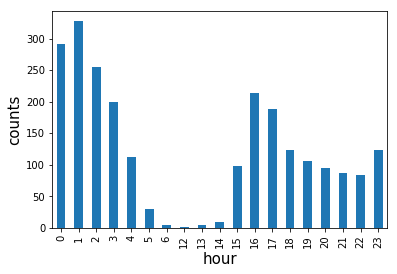

In [102]:
df_updates_copy['hour'].value_counts().sort_index(axis=0, ascending=True).plot(kind = 'bar')
plt.ylabel('counts', fontsize = 15)
plt.xlabel('hour', fontsize = 15)

从图中我们可以看出， 凌晨时段和下午傍晚时段， 发推特的用户比较多

##### 2.哪些种类的狗狗获得了较高的转发数？

经过观察，p1的预测概率远远大于p2和p3, 所以我们将含有p2,p3的数据删除

In [103]:
df_updates_copy.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

其次，我们将预测结果不是狗的数据删除

In [104]:
data_to_delete_index = df_updates_copy[df_updates_copy['p1_dog'] != 'True'].index

In [105]:
df_updates_copy.drop(index = data_to_delete_index, inplace = True)

In [106]:
df_updates_copy['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

retweet_count栏含有空数据，删除后转换为float类型

In [107]:
df_updates_copy[df_updates_copy['retweet_count'] == 'None']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url,status,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,hour
19,888202515573088257,2017-07-21 01:02:36+00:00,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. someone help her,13.0,10.0,Canela,https://t.co/cLyzpcUcMX,None,None,None,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2.0,Pembroke,0.809197,True,1


In [108]:
df_updates_copy.drop(index=[19], inplace = True)

In [109]:
df_updates_copy['retweet_count'] = df_updates_copy['retweet_count'].astype(float)

In [110]:
df_updates_copy[['retweet_count']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 1 to 2355
Data columns (total 1 columns):
retweet_count    1531 non-null float64
dtypes: float64(1)
memory usage: 23.9 KB


In [111]:
df_updates_copy = df_updates_copy.reset_index(drop = True)

In [112]:
temporary_1 = df_updates_copy[['retweet_count', 'p1']]

Text(0.5, 0, 'dog_type')

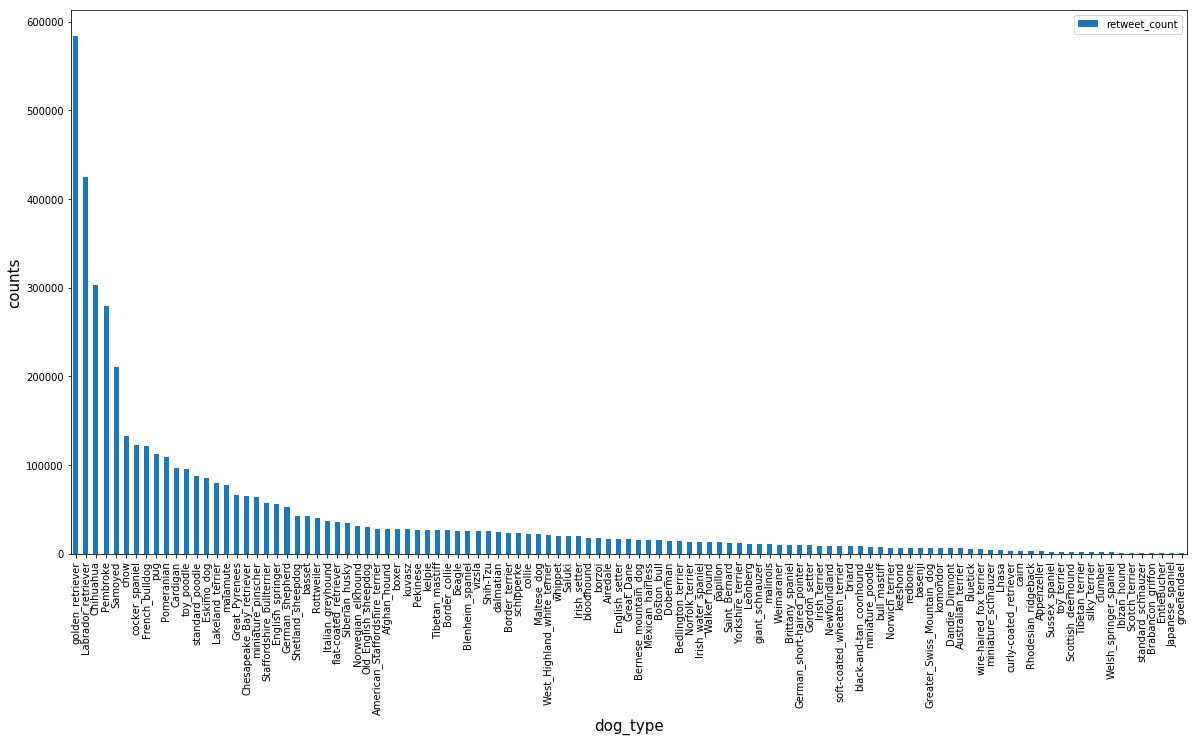

In [113]:
temporary_1.groupby('p1').sum().sort_values(by = 'retweet_count', ascending = False).plot(kind = 'bar', figsize=(20,10))
plt.ylabel('counts', fontsize = 15)
plt.xlabel('dog_type', fontsize = 15)

In [114]:
temporary_1.groupby('p1').sum().sort_values(by = 'retweet_count', ascending = False)

,retweet_count
p1,
golden_retriever,583777.0
Labrador_retriever,424954.0
Chihuahua,302618.0
Pembroke,278975.0
Samoyed,211249.0
chow,132566.0
cocker_spaniel,122308.0
French_bulldog,121066.0
pug,112244.0


我们可以看到golden_retriever比较受欢迎， 得到了最多的转发数

##### 3.得到了高评分的狗狗得到的转发数就一定多吗？

In [115]:
df_updates_copy['rating_denominator'].value_counts()

10.0     1517
50.0        3
80.0        2
130.0       1
150.0       1
110.0       1
40.0        1
90.0        1
20.0        1
11.0        1
0.0         1
70.0        1
Name: rating_denominator, dtype: int64

In [116]:
df_updates_copy[df_updates_copy['rating_denominator'] == 0.0]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url,status,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,hour
329,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n,0.0,0.0,Sam,https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,None,1647.0,5904.0,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,golden_retriever,0.8713420000000001,True,23


In [117]:
df_updates_copy['rates_final'] = df_updates_copy['rating_numerator'] / df_updates_copy['rating_denominator']

In [118]:
df_updates_copy['rates_final'] = df_updates_copy['rates_final'].round(3)

In [119]:
# 由于数据中存在一列 分子分母皆为0的情况，我们对该数据进行处理
df_updates_copy['rates_final'].fillna(0, inplace = True)

In [120]:
df_updates_copy[['rates_final']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 1 columns):
rates_final    1531 non-null float64
dtypes: float64(1)
memory usage: 12.0 KB


In [121]:
temporary_2 = df_updates_copy[['retweet_count', 'rates_final']]

In [122]:
temporary_2.groupby('rates_final').mean().sort_index(ascending = False)

,retweet_count
rates_final,
1.400,9913.739130
1.350,10336.000000
1.300,7221.925764
1.200,3130.401003
1.127,1867.000000
1.126,542.000000
1.100,2277.392638
1.000,1486.547401
0.975,7033.000000


Text(0.5, 0, 'dog_rates')

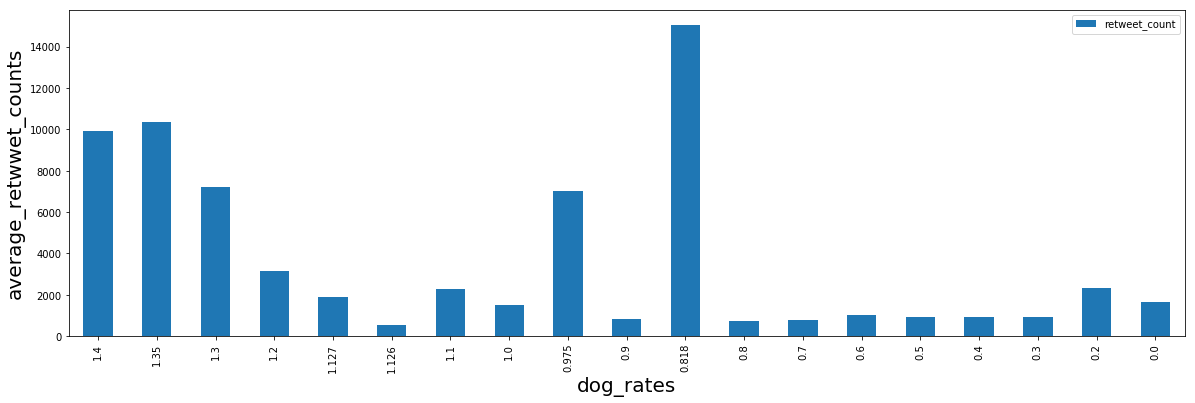

In [123]:
temporary_2.groupby('rates_final').mean().sort_index(ascending = False).plot(kind = 'bar', figsize=(20,6))
plt.ylabel('average_retwwet_counts', fontsize = 20)
plt.xlabel('dog_rates', fontsize = 20)

从图中观察，我们发现总体上，评分高的狗狗得到的相应多的转发数

##### 4. 数据中狗狗评分的高低和所处于的地位有什么关系？

In [124]:
df_updates_copy['status'].value_counts()

None              1295
pupper             150
doggo               51
puppo               20
floofer              8
doggo & pupper       7
Name: status, dtype: int64

In [125]:
data_to_delete_index2 = df_updates_copy[df_updates_copy['status'] == 'None'].index

In [126]:
df_updates_copy.drop(index = data_to_delete_index2, inplace = True)

In [127]:
temporary_3 = df_updates_copy[['status', 'rates_final']]

In [128]:
temporary_3

,status,rates_final
7,doggo,1.400
10,puppo,1.300
12,puppo,1.300
24,pupper,1.200
34,doggo,1.200
37,floofer,1.300
40,pupper,1.200
45,pupper,1.400
54,puppo,1.300
58,pupper,1.400


In [129]:
temporary_3.groupby('rates_final')['status'].value_counts()

rates_final  status        
0.700        pupper             2
0.800        pupper             5
             doggo              2
0.900        pupper            11
             puppo              1
1.000        pupper            34
             doggo              3
             puppo              3
             floofer            1
1.100        pupper            39
             doggo             11
             floofer            2
             doggo & pupper     1
             puppo              1
1.127        pupper             1
1.200        pupper            39
             doggo             12
             doggo & pupper     6
             puppo              5
             floofer            2
1.300        doggo             17
             pupper            14
             puppo              9
             floofer            3
1.400        doggo              6
             pupper             5
             puppo              1
Name: status, dtype: int64

In [130]:
size=temporary_3.groupby('rates_final')['status'].value_counts()
n=20

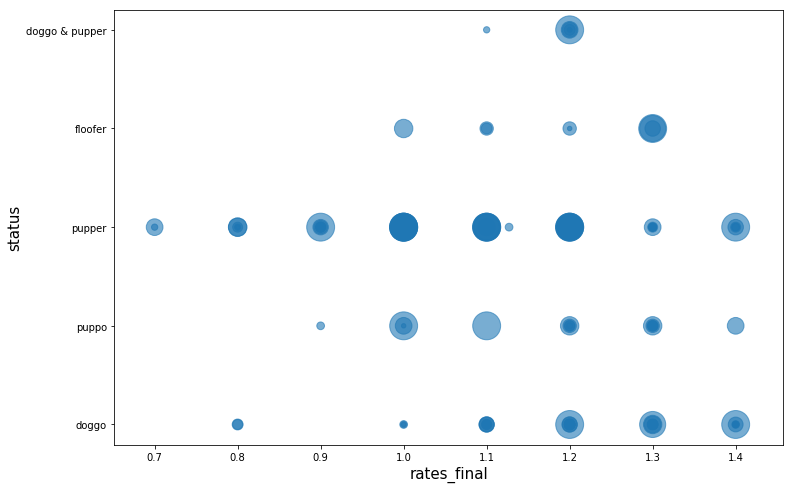

In [131]:
plt.figure(figsize=(12,8))
plt.xlabel('rates_final',fontsize= 15)
plt.ylabel('status',fontsize= 15)
plt.scatter(df_updates_copy['rates_final'],df_updates_copy['status'],s=size*n,alpha=0.6)
plt.show()


观察数据发现，数据中狗狗评分的高低和所处于的地位关系不大，评分中的地位大多被pupper和doggo占据,评分高的狗狗，处于doggo地位更多。

#### 得出结论

1. 在一天中的哪个时段，发推文的用户比较多？   
    凌晨时段和下午傍晚时段。

2. 哪些种类的狗狗获得了较高的转发数？        
    golden_retriever得到了最多的转发数。

3. 得到了高评分的狗狗得到的转发数就一定多吗？<br/> 
    总体上，评分高的狗狗得到的相应多的转发数。

4. 数据中狗狗评分的高低和所处于的地位有什么关系？<br/>
    关系不大，评分中的地位大多被pupper和doggo占据，评分高的狗狗，处于doggo地位更多。